In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1, 6, 150)
plot_x

array([-1.        , -0.95302013, -0.90604027, -0.8590604 , -0.81208054,
       -0.76510067, -0.71812081, -0.67114094, -0.62416107, -0.57718121,
       -0.53020134, -0.48322148, -0.43624161, -0.38926174, -0.34228188,
       -0.29530201, -0.24832215, -0.20134228, -0.15436242, -0.10738255,
       -0.06040268, -0.01342282,  0.03355705,  0.08053691,  0.12751678,
        0.17449664,  0.22147651,  0.26845638,  0.31543624,  0.36241611,
        0.40939597,  0.45637584,  0.5033557 ,  0.55033557,  0.59731544,
        0.6442953 ,  0.69127517,  0.73825503,  0.7852349 ,  0.83221477,
        0.87919463,  0.9261745 ,  0.97315436,  1.02013423,  1.06711409,
        1.11409396,  1.16107383,  1.20805369,  1.25503356,  1.30201342,
        1.34899329,  1.39597315,  1.44295302,  1.48993289,  1.53691275,
        1.58389262,  1.63087248,  1.67785235,  1.72483221,  1.77181208,
        1.81879195,  1.86577181,  1.91275168,  1.95973154,  2.00671141,
        2.05369128,  2.10067114,  2.14765101,  2.19463087,  2.24

In [3]:
plot_y = (plot_x - 2.5) ** 2 - 1
plot_y

array([11.25      , 10.92334805, 10.60111031, 10.28328679,  9.96987748,
        9.66088239,  9.35630152,  9.05613486,  8.76038242,  8.46904419,
        8.18212017,  7.89961038,  7.6215148 ,  7.34783343,  7.07856628,
        6.81371335,  6.55327463,  6.29725012,  6.04563984,  5.79844376,
        5.55566191,  5.31729427,  5.08334084,  4.85380163,  4.62867664,
        4.40796586,  4.19166929,  3.97978695,  3.77231881,  3.5692649 ,
        3.3706252 ,  3.17639971,  2.98658844,  2.80119139,  2.62020855,
        2.44363993,  2.27148552,  2.10374533,  1.94041935,  1.78150759,
        1.62701004,  1.47692672,  1.3312576 ,  1.1900027 ,  1.05316202,
        0.92073555,  0.7927233 ,  0.66912526,  0.54994144,  0.43517184,
        0.32481645,  0.21887528,  0.11734832,  0.02023557, -0.07246295,
       -0.16074726, -0.24461736, -0.32407324, -0.3991149 , -0.46974235,
       -0.53595559, -0.59775461, -0.65513941, -0.70811   , -0.75666637,
       -0.80080852, -0.84053646, -0.87585019, -0.9067497 , -0.93

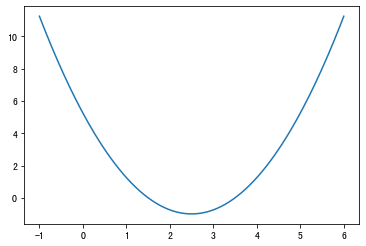

In [4]:
plt.plot(plot_x, plot_y)
plt.show()

In [5]:
def loss_function(theta):
    return (theta - 2.5) ** 2 - 1.0

In [6]:
def derivative(theta):
    return 2 * (theta - 2.5)

In [7]:
theta = 0.0
lr = 0.1
epsilon = 1e-8
while 1:
    last_theta = theta
    gradient = derivative(theta)
    theta -= gradient * lr
    if abs(loss_function(theta) - loss_function(last_theta)) < epsilon:
        break

In [8]:
theta

2.499891109642585

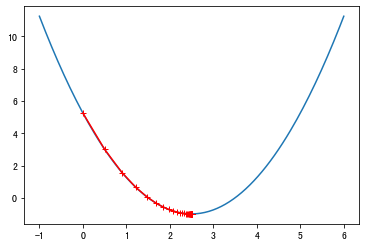

In [9]:
def loss_function(theta):
    try:
        return (theta - 2.5) ** 2 - 1.0
    except:
        return float('inf')
    

def derivative(theta):
    return 2 * (theta - 2.5)


theta = 0.0
lr = 0.1
epsilon = 1e-8
theta_hist = [theta]


def gradient_descent(init_theta, lr, n_iters = 1e4, epsilon = 1e-8):
    theta = init_theta
    i_iters = 0
    while i_iters < n_iters:
        gradient = derivative(theta)
        last_theta = theta
        theta -= gradient * lr
        theta_hist.append(theta)
        if abs(loss_function(theta) - loss_function(last_theta)) < epsilon:
            break
        i_iters += 1
        

gradient_descent(theta, lr)
plt.plot(plot_x, plot_y)
plt.plot(np.array(theta_hist), loss_function(np.array(theta_hist)), color = 'r', marker = '+')
plt.show()

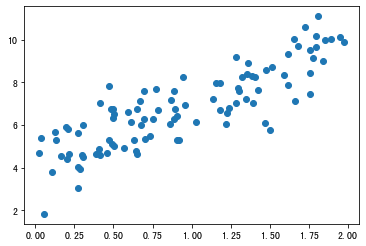

In [10]:
np.random.seed(2048)
x = 2 * np.random.random(size = 100)
y = x * 3. + 4. + np.random.normal(size = 100)
plt.scatter(x, y)
plt.show()

In [11]:
X = x.reshape(-1, 1)
def loss_function(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')
    

def derivative(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
        
    return res * 2 / len(X_b)


def gradient_descent(X_b, y, init_theta, lr, n_iters = 1e4, epsilon = 1e-8):
    theta = init_theta
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = derivative(theta, X_b, y)
        last_theta = theta
        theta = theta - lr * gradient
        if(abs(loss_function(theta, X_b, y) - loss_function(last_theta, X_b, y)) < epsilon):
            break
        cur_iter += 1

    return theta


X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
init_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, init_theta, eta)
theta

array([4.18093525, 2.78580126])

In [13]:
from ML_Package.Gradient_Descent import Gradient_Descent

lin_reg = Gradient_Descent()
lin_reg.fit_gd(X, y)

gradient_descent()

In [14]:
lin_reg.coef_

array([2.78580126])

In [15]:
lin_reg.intercept_

4.180935248375558